In [75]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

os.chdir(os.path.dirname(os.path.abspath(__file__)))

In [76]:
# 人間関係のネットワークを可視化する
# データ読み込み
df_links = pd.read_csv("input/links.csv")
df_links

,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node10,Node11,Node12,Node13,Node14,Node15,Node16,Node17,Node18,Node19
0,Node0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Node2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Node4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,Node5,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,Node6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,Node7,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,Node8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9,Node9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


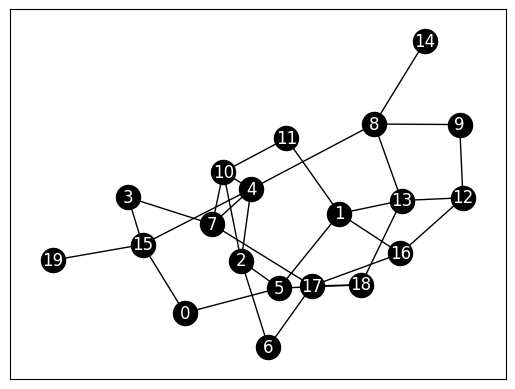

In [77]:
# グラフオブジェクトの作成
G = nx.Graph()

# ノード（頂点）の設定
n_repeaters = len(df_links)

G.add_nodes_from([str(n) for n in range(n_repeaters)])

# エッジ（辺）の設定
G.add_edges_from(
    [
        (str(i), str(j))
        for i in range(n_repeaters)
        for j in range(n_repeaters)
        if df_links.iloc[:, 1:].iloc[i, j] == 1
    ]
)

# 描画
nx.draw_networkx(G, node_color="k", edge_color="k", font_color="w")

In [78]:
# 口コミによる情報伝播の様子を可視化する
def determine_link(percent: float) -> float:
    """
    口コミを伝播させるかどうかを決定する

    Args:
        percent (float): 口コミが起こる確率
    """
    random_value = np.random.rand()
    if random_value <= percent:
        return 1
    else:
        return 0


def simulate_percolation(
    n_repeaters: int, list_active: list, percent_percolation: float
) -> list:
    """
    口コミの伝播をシミュレートする

    Args:
        n_repeaters (int): リピーターの人数
        list_active (list): 各リピーター（ノード）に口コミが伝わったかどうかを0,1で表現するリスト
        percent_percolation (float): 口コミが起こる確率

    Returns:
        list_active(list): 更新した各リピーター（ノード）に口コミが伝わったかどうかを0,1で表現するリスト
    """
    for i in range(n_repeaters):
        if list_active[i] == 1:  # 引数で受け取ったlist_activeで対象ユーザーがactiveのとき
            for j in range(n_repeaters):
                if (
                    df_links.iloc[:, 1:].iloc[i, j] == 1
                ):  # 対象ユーザーと繋がっているユーザー（対応ユーザーと呼ぶ）毎に口コミを伝播させるかどうかを決定する関数を実行する
                    if determine_link(percent_percolation) == 1:  # 伝播する場合
                        list_active[j] = 1  # 更新するlist_activeの対応ユーザーをactiveにする
    return list_active


percent_percolation = 0.1
n_t = 100

# アクティブユーザーリストを初期化（ユーザー0のみactiveにする）
list_active = np.zeros(n_repeaters)
list_active[0] = 1

# アクティブユーザーリストの履歴リスト（シミュレートの試行毎にアクティブユーザーリストを残す）
list_timeseries = []
list_timeseries.append(list_active.copy())

for t in range(1, n_t + 1):
    list_active = simulate_percolation(n_repeaters, list_active, percent_percolation)
    list_timeseries.append(list_active.copy())

In [79]:
# 伝播した口コミの様子を可視化する
def active_node_coloring(list_active: list) -> list:
    """口コミが伝わったユーザーのノード色を赤にする関数

    Args:
        list_active (list): アクティブユーザーのリスト（アクティブなら1、そうでないなら0）

    Returns:
        list: アクティブユーザーのノード色のリスト（アクティブなら"r"、そうでないなら"k"）
    """
    list_color = []
    for i in range(n_repeaters):
        if (
            list_timeseries[t][i] == 1
        ):  # 試行回数tのときのアクティブユーザーリストのi番目のユーザーがactiveならノード色のリストに赤を追加する
            list_color.append("r")
        else:
            list_color.append("k")  # 非アクティブなら黒を追加する
    return list_color

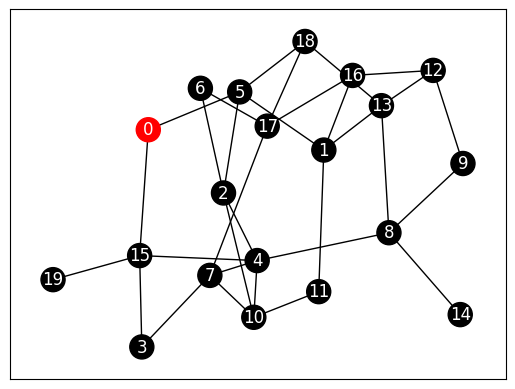

In [80]:
# 初期のアクティブユーザー可視化
t = 0
nx.draw_networkx(G, font_color="w", node_color=active_node_coloring(list_timeseries[t]))

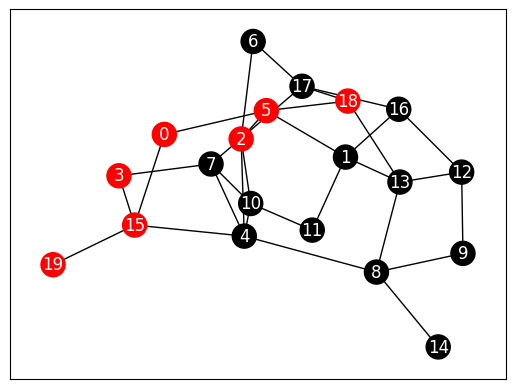

In [81]:
# 試行回数10のときのアクティブユーザー可視化
t = 10
nx.draw_networkx(G, font_color="w", node_color=active_node_coloring(list_timeseries[t]))

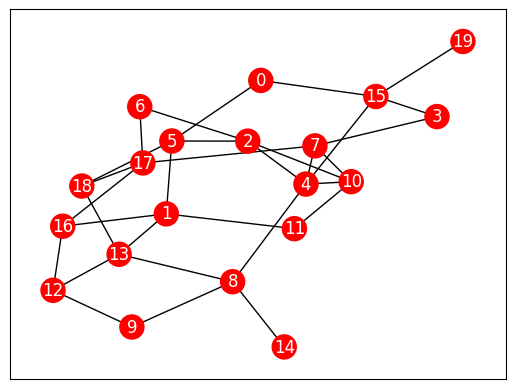

In [82]:
# 試行回数100のときのアクティブユーザー可視化
t = 100
nx.draw_networkx(G, font_color="w", node_color=active_node_coloring(list_timeseries[t]))

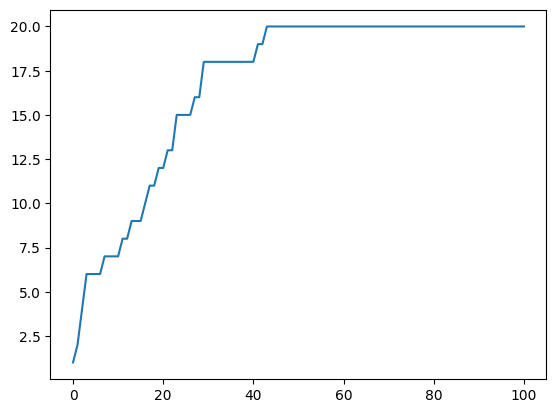

In [83]:
# 口コミの時系列変化のグラフを作成する
list_timeseries_active_num = [sum(lst) for lst in list_timeseries]

plt.plot(list_timeseries_active_num)

In [84]:
# 会員数の時系列変化をシミュレートする

In [85]:
# 次の時刻の会員数をシミュレートする関数の定義
def simulate_n_members(
    n_people: int,
    list_member: list,
    join_probability: float,
    cancel_probability: float,
    df_links: pd.DataFrame,
) -> list:
    """
    次の時刻の会員数をシミュレートする

    Args:
        n_people (int): シミュレート対象人数
        list_member (list): 現在の、シミュレート対象の人が会員かどうか（会員なら1、非会員なら0）のリスト
        join_probability (float): 口コミが伝わってかつ入会する確率
        cancel_probability (float): 会員が退会する確率
        df_links (pd.DataFrame): シミュレート対象の人同士の関係表（繋がりがあれば1、なければ0）

    Returns:
        list_member (list): 次の時刻の、シミュレート対象の人が会員かどうかのリスト
    """
    list_member_backup = list_member.copy()

    for i in range(n_people):
        if list_member_backup[i] == 1:
            # 拡散
            for j in range(n_people):
                if (
                    df_links.iloc[i, j + 1] == 1
                    and determine_link(join_probability) == 1
                ):
                    list_member[j] = 1
            # 消滅
            if determine_link(cancel_probability) == 1:
                list_member[i] = 0

    return list_member

In [86]:
# シミュレーションの実行
join_probability = 0.1
cancel_probability = 0.05
n_t = 100
n_people = len(df_links)
list_member = np.zeros(n_people)
list_member[0] = 1

list_timeseries = []
list_timeseries.append(list_member.copy())

for t in range(1, n_t + 1):
    list_member = simulate_n_members(
        n_people, list_member, join_probability, cancel_probability, df_links
    )
    list_timeseries.append(list_member.copy())

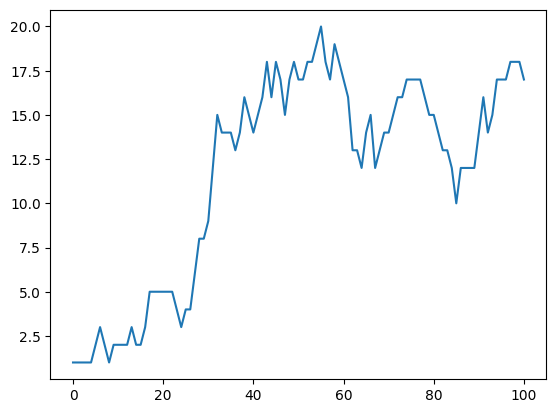

In [87]:
# 会員数の時系列変化を可視化する
list_timeseries_num = [sum(lst) for lst in list_timeseries]

plt.plot(list_timeseries_num)

In [88]:
# パラメータの全体像を「相図」を見ながら把握する
# シミュレーションの条件（試行回数、パラメータの刻みの数）の設定
n_t = 100
n_join_conditions = 20
n_cancel_conditions = 20
# 各入会確率と退会確率下でのn_tヶ月後の会員数を格納する配列の作成
phaseDiagram = np.zeros((n_join_conditions, n_cancel_conditions))

# 初期の会員リスト（initial_list_active）の作成
initial_list_active = np.zeros(n_people)
initial_list_active[0] = 1

for i_join in range(n_join_conditions):
    # 入会確率を5%刻みで変化させる
    join_probability = 0.05 * i_join

    for i_cancel in range(n_cancel_conditions):
        # 退会確率を5%刻みで変化させる
        cancel_probability = 0.05 * i_cancel

        # 会員リスト（list_active）の初期化
        list_active = initial_list_active.copy()

        # n_tヶ月後の会員数をシミュレートする
        for t in range(n_t):
            list_active = simulate_n_members(
                n_people, list_active, join_probability, cancel_probability, df_links
            )
        phaseDiagram[i_join, i_cancel] = sum(list_active)

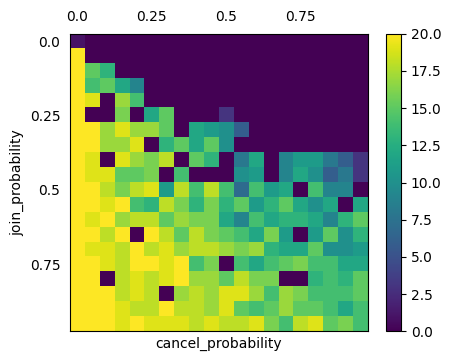

In [89]:
plt.matshow(phaseDiagram)
plt.colorbar(shrink=0.8)
plt.xlabel("cancel_probability")
plt.ylabel("join_probability")
plt.xticks(np.arange(0.0, 20.0, 5), np.arange(0.0, 1.0, 0.25))
plt.yticks(np.arange(0.0, 20.0, 5), np.arange(0.0, 1.0, 0.25))
plt.tick_params(bottom=False, left=False, right=False, top=False)
plt.show()

In [90]:
# スポーツジム会員全体のシミュレーション

In [91]:
# 1.データ読み込み

In [92]:
# ジム会員同士のSNSの繋がり有無テーブル
df_member_links = pd.read_csv("input/links_members.csv")
df_member_links.head()

,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node530,Node531,Node532,Node533,Node534,Node535,Node536,Node537,Node538,Node539
0,Node0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Node2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Node4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [93]:
# 各ジム会員の過去24ヶ月のジム利用状況テーブル
df_member_info = pd.read_csv("input/info_members.csv")
df_member_info.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,Node0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,Node2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3,Node3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
4,Node4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [94]:
# 2.各会員のリンク数のヒストグラムを作成する
# 2-1.各会員のリンク数を計算する
n_members = len(df_member_info)
link_numbers = [sum(df_member_links["Node" + str(i)]) for i in range(n_members)]
link_numbers

[32.0,
 128.0,
 155.0,
 44.0,
 108.0,
 32.0,
 152.0,
 135.0,
 143.0,
 75.0,
 125.0,
 96.0,
 107.0,
 141.0,
 165.0,
 71.0,
 92.0,
 180.0,
 67.0,
 30.0,
 79.0,
 11.0,
 195.0,
 139.0,
 175.0,
 148.0,
 127.0,
 162.0,
 95.0,
 125.0,
 55.0,
 120.0,
 148.0,
 114.0,
 143.0,
 22.0,
 129.0,
 56.0,
 17.0,
 79.0,
 78.0,
 78.0,
 159.0,
 183.0,
 79.0,
 99.0,
 36.0,
 41.0,
 136.0,
 31.0,
 119.0,
 180.0,
 169.0,
 167.0,
 124.0,
 37.0,
 152.0,
 21.0,
 77.0,
 55.0,
 38.0,
 67.0,
 103.0,
 103.0,
 114.0,
 109.0,
 92.0,
 122.0,
 190.0,
 33.0,
 196.0,
 50.0,
 165.0,
 17.0,
 123.0,
 97.0,
 19.0,
 132.0,
 54.0,
 113.0,
 106.0,
 174.0,
 111.0,
 107.0,
 193.0,
 117.0,
 164.0,
 53.0,
 125.0,
 67.0,
 175.0,
 82.0,
 111.0,
 94.0,
 98.0,
 106.0,
 89.0,
 28.0,
 98.0,
 41.0,
 59.0,
 55.0,
 146.0,
 131.0,
 91.0,
 45.0,
 136.0,
 89.0,
 122.0,
 65.0,
 110.0,
 88.0,
 117.0,
 71.0,
 157.0,
 112.0,
 106.0,
 148.0,
 54.0,
 127.0,
 149.0,
 174.0,
 89.0,
 65.0,
 159.0,
 56.0,
 109.0,
 105.0,
 133.0,
 64.0,
 126.0,
 98.0,
 118

(array([  6.,  21.,  54., 141., 215.,  67.,  23.,  13.,   0.,   0.]),
 array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225., 250.]),
 <BarContainer object of 10 artists>)

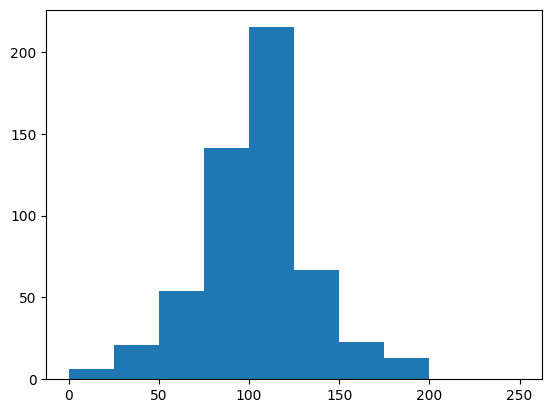

In [95]:
# 2-2.ヒストグラムを作成する
plt.hist(link_numbers, bins=10, range=(0, 250))

In [96]:
# 3.実データからパラメータ（活性化（利用しなかった翌月に利用する）確率と非活性化（利用した翌月に利用しなくなる）確率）を予測する
n_t = len(df_member_info.columns) - 1
print(f"利用データ期間:{n_t}ヶ月")

利用データ期間:24ヶ月


In [97]:
# 3-1.非活性化（利用した翌月に利用しなくなる）確率の推定
# 全会員の利用データ期間最終月前月までの利用回数の合計
count_active = df_member_info.iloc[:, 1:n_t].sum(axis=1).sum()
count_active

8426.0

In [98]:
# 全会員の利用月の翌月に利用しなかった回数の合計
count_active_to_inactive = (
    (
        (df_member_info.iloc[:, 1:] == 1)  # 前月に利用していて、かつ、
        & (df_member_info.iloc[:, 1:].shift(-1, axis=1) == 0)  # 当月利用しなかった
    )
    .sum(axis=1)  # 各ユーザーでの発生回数をカウント
    .sum()  # 全ユーザーで集計
)
count_active_to_inactive
# 非活性化確率 = 利用月の翌月に利用しなかった回数 / 全利用回数
estimated_cancel_probability = count_active_to_inactive / count_active
print(f"推定非活性化確率:{estimated_cancel_probability}")

推定非活性化確率:0.10147163541419416


In [99]:
# 3-2.活性化（利用しなかった翌月に利用する）確率の推定
# 繋がりがある会員が利用した月に対象の会員が利用していない数のカウント
count_link = 0
# 繋がりがある会員が利用した月に対象の会員が利用しておらず、次月利用した数のカウント
# ただし、同一月でカウントするのは１回のみ（他の繋がりがある会員で同一の現象が起こっていてもその月は＋１しかしない）
count_link_to_active = 0

for t in range(n_t - 1):
    # 24ヶ月間の利用データから対象月に利用した会員の行のみを抽出したデータ（df_link_t）を作成する
    df_link_t = df_member_info[df_member_info[str(t)] == 1]

    temp_flag_count = np.zeros(n_members)

    # 対象月に利用した会員毎にSNSの繋がり有無テーブルからその会員と繋がりのある会員の行のみを抽出したデータ（df_link_temp）を作成する
    for i in df_link_t.index:
        df_link_temp = df_member_links[df_member_links[f"Node{i}"] == 1]

        # 対象月に利用した会員と繋がりのある会員毎に
        for j in df_link_temp.index:
            # その会員が対象月に利用していなければリンクをカウントする
            # 書籍は誤りがある。（locではなくiloc参照にしており、Unnamed:0列を考慮できていない）
            if df_member_info.loc[j, str(t)] == 0 and temp_flag_count[j] == 0:
                count_link += 1
                # さらに、その会員が次月に利用し、かつまだ対象月でカウントしていなければカウントする
                if df_member_info.loc[j, str(t + 1)] == 1:
                    temp_flag_count[j] = 1
                    count_link_to_active += 1

estimated_join_probability = count_link_to_active / count_link
print(f"推定活性化確率:{estimated_join_probability}")

推定活性化確率:0.039006364196263604


In [100]:
# 実データとシミュレーションを比較する
# 推定した活性化、非活性化確率を入会、退会確率に代入する
join_probability = estimated_join_probability
cancel_probability = estimated_cancel_probability

# シミュレーション条件
n_t = 24
n_members = len(df_member_info.index)

# 初期の会員リスト（initial_list_active）の作成
initial_list_active = np.zeros(n_people)
initial_list_active[0] = 1

# シミュレーション結果を格納する配列
list_timeseries = []
list_active = initial_list_active.copy()
list_timeseries.append(list_active.copy())

for t in range(n_t):
    list_active = simulate_n_members(
        n_people, list_active, join_probability, cancel_probability, df_member_links
    )
    list_timeseries.append(list_active.copy())

# シミュレーション結果（各月の会員数）
list_timeseries_num = [sum(lst) for lst in list_timeseries]

# 実際の各月の会員数（シミュレーション結果との比較用）
list_timeseries_num_real = [sum(df_member_info[str(t)]) for t in range(n_t)]

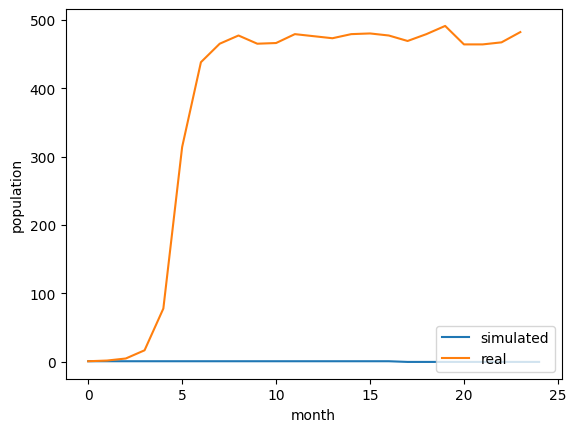

In [101]:
# 可視化
plt.plot(list_timeseries_num, label="simulated")
plt.plot(list_timeseries_num_real, label="real")
plt.xlabel("month")
plt.ylabel("population")
plt.legend(loc="lower right")
plt.show()

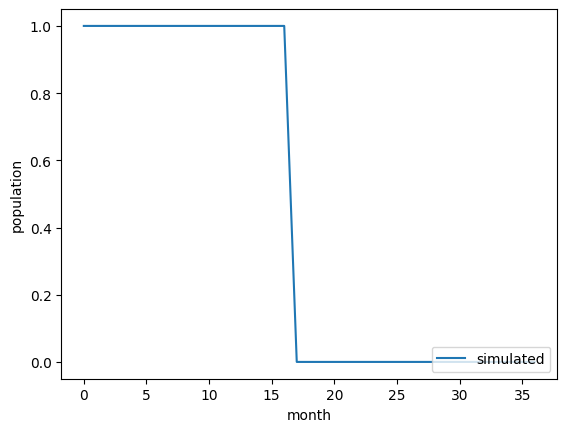

In [102]:
# シミュレーション条件
n_t = 36

# シミュレーション結果を格納する配列
list_timeseries = []
list_active = initial_list_active.copy()
list_timeseries.append(list_active.copy())

for t in range(n_t):
    list_active = simulate_n_members(
        n_people, list_active, join_probability, cancel_probability, df_member_links
    )
    list_timeseries.append(list_active.copy())

# シミュレーション結果（各月の会員数）
list_timeseries_num = [sum(lst) for lst in list_timeseries]

# 可視化
plt.plot(list_timeseries_num, label="simulated")
plt.xlabel("month")
plt.ylabel("population")
plt.legend(loc="lower right")
plt.show()